# Ejemplo de Clase

Primer ejemplo de **Machine Learnig** sobre la clidad de vida dado el PIB per Cápita

- PIB per Cápita tomado de

<font color = "blue">Texto de prueba a color</font>

[UCO]{http://www.uco.edu.co}

$$ x_{1,2}=\frac{(-b \pm \sqrt(b^2 - 4ac))}{2a}$$

#### Definir una ruta raíz para el proyecto
'datasets/lifesat/'

In [2]:
import os
datapath = os.path.join("datasets","lifesat","")

#### Asignando los tamaños a los tooltips de los graficos

In [3]:
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

#### Importamos las librerias necesarias

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

#### Cargamos los datos necesarios

In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands = ',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands = ',', delimiter = '\t', encoding='latin1',na_values="n/a" )

In [6]:
oecd_bli.head()

LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   
3     units                    NaN               NaN    0.2        NaN   
4     units                    NaN               NaN    0.9        NaN   

             Flags  
0  Estimated value  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [7]:
gdp_per_capita.head()

Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0  
1   3995.383                 2010.0  
2   4318.135                 2014.0  
3   4100.315                 2014.0  
4  14414.302                 2011.0

In [8]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head()

LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   
3     units                    NaN               NaN    0.2        NaN   
4     units                    NaN               NaN    0.9        NaN   

             Flags  
0  Estimated value  
1              NaN  
2              NaN  
3              NaN  
4              NaN

#### Reformateamos el DataFrame de modo que el indice sea el pais y cada columna sea cada posible valor tomado por Indicator

In [9]:
oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values = 'Value' )

In [10]:
oecd_bli.head()

Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   
Belgium             21.0           6.6                          4.5   
Brazil              18.0           7.9                          4.0   
Canada              15.0           1.3                         10.5   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   
Belgium                                   2.0                    72.0   
Brazil                                    6.7                    45.0   
Canada                                    0.2                    89.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   
Belgium                                 4.57             62.0            1.1   
Brazil                                 10.41             67.0           25.5   
Canada                                  3.94             72.0            1.5   

Indicator  Household net adjusted disposable income  \
Country                                               
Australia                                   31588.0   
Austria                                     31173.0   
Belgium                                     28307.0   
Brazil                                      11664.0   
Canada                                      29365.0   

Indicator  Household net financial wealth  ...  Long-term unemployment rate  \
Country                                    ...                                
Australia                         47657.0  ...                         1.08   
Austria                           49887.0  ...                         1.19   
Belgium                           83876.0  ...                         3.88   
Brazil                             6844.0  ...                         1.97   
Canada                            67913.0  ...                         0.90   

Indicator  Personal earnings  Quality of support network  Rooms per person  \
Country                                                                      
Australia            50449.0                        92.0               2.3   
Austria              45199.0                        89.0               1.6   
Belgium              48082.0                        94.0               2.2   
Brazil               17177.0                        90.0               1.6   
Canada               46911.0                        92.0               2.5   

Indicator  Self-reported health  Student skills  \
Country                                           
Australia                  85.0           512.0   
Austria                    69.0           500.0   
Belgium                    74.0           509.0   
Brazil                     69.0           402.0   
Canada                     89.0           522.0   

Indicator  Time devoted to leisure and personal care  Voter turnout  \
Country                                                               
Australia                                      14.41           93.0   
Austria                                        14.46           75.0   
Belgium                                        15.71           89.0   
Brazil                                         14.97           79.0   
Canada                                         14.25           61.0   

Indicator  Water quality  Years in education  
Country                                

#### Renombramos 2015 por GDP per Capita para mejor compresion
- implace = True --> Sobreescribe los datos

In [11]:
gdp_per_capita.rename(columns={"2015":"GDP per Capita"}, inplace = True) 

#### Indice --> Country

In [12]:
gdp_per_capita.set_index("Country", inplace = True)

#### Juntamos los datafames, Poniendo a la izquierda oecd_bli y a la derecha 

In [13]:
full_country_stats = pd.merge(left=oecd_bli,
                              right = gdp_per_capita,
                              left_index = True,
                              right_index = True
                             )
full_country_stats

Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria                   27.0           3.4                          7.1   
Belgium                   21.0           6.6                          4.5   
Brazil                    18.0           7.9                          4.0   
Canada                    15.0           1.3                         10.5   
Chile                     46.0           6.9                          2.0   
Czech Republic            16.0           2.8                          6.8   
Denmark                   15.0           3.9                          7.0   
Estonia                    9.0           5.5                          3.3   
Finland                   15.0           2.4                          9.0   
France                    12.0           5.0                          3.5   
Germany                   16.0           3.6                          4.5   
Greece                    27.0           3.7                          6.5   
Hungary                   15.0           3.6                          7.9   
Iceland                   18.0           2.7                          5.1   
Ireland                   13.0           2.6                          9.0   
Israel                    21.0           6.4                          2.5   
Italy                     21.0           4.7                          5.0   
Japan                     24.0           1.4                          7.3   
Korea                     30.0           2.1                         10.4   
Luxembourg                12.0           4.3                          6.0   
Mexico                    30.0          12.8                          9.0   
Netherlands               30.0           4.9                          6.1   
New Zealand               11.0           2.2                         10.3   
Norway                    16.0           3.3                          8.1   
Poland                    33.0           1.4                         10.8   
Portugal                  18.0           5.7                          6.5   
Russia                    15.0           3.8                          2.5   
Slovak Republic           13.0           3.0                          6.6   
Slovenia                  26.0           3.9                         10.3   
Spain                     24.0           4.2                          7.3   
Sweden                    10.0           5.1                         10.9   
Switzerland               20.0           4.2                          8.4   
Turkey                    35.0           5.0                          5.5   
United Kingdom            13.0           1.9                         11.5   
United States             18.0           1.5                          8.3   

                 Dwellings without basic facilities  Educational attainment  \
Country                                                                       
Australia                                       1.1                    76.0   
Austria                                         1.0                    83.0   
Belgium                                         2.0                    72.0   
Brazil                                          6.7                    45.0   
Canada                                          0.2                    89.0   
Chile                                           9.4                    57.0   
Czech Republic                                  0.9                    92.0   
Denmark                                         0.9                    78.0   
Estonia                                         8.1                    90.0   
Finland                                         0.6                    85.0   
France                                          0.5                    73.0   
Germany                                         0.1            

#### Ordenamos del que menos gana al que mas gana

In [14]:
full_country_stats.sort_values(by='GDP per Capita', inplace = True)

#### Determinamos la cantidad de registros que tiene el Dataframe y la cantidad de columnas

In [15]:
full_country_stats.shape

(36, 30)

#### Removemos los indices que vamos a usar en las pruebas y mantenemos los que usamos para entrenamiento

In [16]:
remove_indices = [0,1,6,8,33,34,35]
keep_indices = [i for i in range(36) if i not in remove_indices]
# keep_indices = list(set(range(36)) - set(remove_indices))
print(remove_indices, keep_indices)

[0, 1, 6, 8, 33, 34, 35] [2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


#### Filtramos columnas
- loc para filtrar filas
- iloc para filtrar columnas


#### Obtenemos el dataset necesario

In [17]:
sample_data = full_country_stats[['GDP per Capita','Life satisfaction']].iloc[keep_indices]
sample_data

GDP per Capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511                7.0
Finland               41973.988                7.4
Canada                43331.961                7.3
Netherlands           43603.115                7.3
Austria               43724.031                6.9
United Kingdom        43770.688                6.8
Sweden                49866.266                7.2
Iceland               50854.583                7.5
Australia             50961.865                7.3
Ireland               51350.744                7.0
Denmark               52114.165                7.5
United States         55805.204                7.2

#### Obtenemos los datos para las pruebas

In [18]:
missing_data = full_country_stats[['GDP per Capita', 'Life satisfaction']].iloc[remove_indices]
print(missing_data.shape)
missing_data.head()

(7, 2)


GDP per Capita  Life satisfaction
Country                                          
Brazil                8669.998                7.0
Mexico                9009.280                6.7
Chile                13340.905                6.7
Czech Republic       17256.918                6.5
Norway               74822.106                7.4

#### Extraemos los datos del DataFrame

In [19]:
country_stats = sample_data
X = np.c_[country_stats["GDP per Capita"]]
y = np.c_[country_stats["Life satisfaction"]]
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

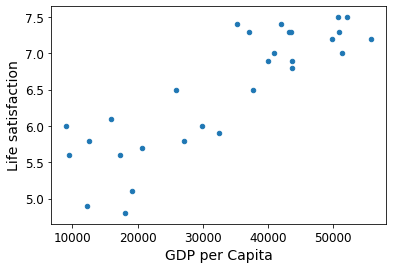

In [20]:
country_stats.plot(kind = 'scatter', x = 'GDP per Capita', y = 'Life satisfaction')

#### Creamos el modelo

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Entrenamos el modelo

In [22]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Probamos con un nuevo pais (Chipre)

In [23]:
X_new = [[22587]]
model.predict(X_new)

array([[5.96242338]])

#### Verificamos la pendiente 'coef_' y el intercepto 'intercept_' del modelo

In [24]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([[4.91154459e-05]]),
 '_residues': array([5.24175977]),
 'rank_': 1,
 'singular_': array([77520.91586356]),
 'intercept_': array([4.8530528])}

## Usando un algoritmo basado en instancias (KNN)

In [25]:
model_2 = KNeighborsRegressor(3)
model_2.__dict__

{'n_neighbors': 3,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [26]:
model_2.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
model_2.predict(X_new)

array([[5.76666667]])

### Prediciendo el Life Satisfaction de Colombia usando una implementación propia de KNN

In [28]:
gdp_colombia = gdp_per_capita[(gdp_per_capita.index == "Colombia")]["GDP per Capita"]
gdp_colombia.values

array([6083.51])

In [29]:
life_satisfaction_Colombia = model_2.predict([gdp_colombia.values])
life_satisfaction_Colombia

array([[5.5]])

#### Definimos el algoritmo para KNN

In [30]:
# Creamos nuestra clase KNN
class KNN:
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
    
    def train(self, X,y):
        self.X = np.array(X)
        self.y = np.array(y)
    
    def predict(self, X_new=None):
        x_new_row = np.array(X_new)
        if len(x_new_row) != self.X.shape[1]:
            raise Exception("La dimension del registro de prueba debe ser igual a la dimensión del conjuto de datos entregado")
        else:
            neightbors = np.arange(self.k) # Asumimos que los más cercanos son los k primeros registros de X
            for i in range(len(self.X)): # Recorremos por completo a X
                distance = self.distance(self.X[i], x_new_row)# Calculamos la distancia entre el registro de prueba y X[i]
                for j in range(len(neightbors)): # Tomamos a cada vecino
                    if distance < self.distance(self.X[neightbors[j]], x_new_row): # Determinamos si la distancia calculada es
                        # menor que la distancia de alguno de los vecinos ya encontrados
                        neightbors[j] = i if neightbors[j] != i else neightbors[j] # Reemplazamos el vecino
                        break
                        
        return round(np.mean([y[e] for e in neightbors]),1), neightbors # Retornamos la media de las etiquetas de los vecinos encontrados        
    def distance(self,x,y):
        c = x-y
        c = c**2
        sq = np.sqrt(sum(c))
        return sq
    
    def __repr__(self):
        return f"k:{self.k}"


#### Creamos el modelo

In [31]:
own_knn_model = KNN(2)
own_knn_model.train(X,y)
own_knn_model

k:2

In [32]:
own_knn_model.predict(np.array([6083.51]))

(6.0, array([0, 0]))

In [33]:
import sklearn

In [34]:
lin_reg_full = sklearn.linear_model.LinearRegression()
xfull = np.c_[full_country_stats['GDP per Capita']]
yfull = np.c_[full_country_stats['Life satisfaction']]
lin_reg_full.fit(xfull, yfull)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
t0full, t1full

(5.763029861307918, 2.3177337047396075e-05)

In [36]:
t1 = 4.91154459e-05
t0 = 4.8530528

#### Anadiendo penalización a los modelos

In [37]:
ridge = sklearn.linear_model.Ridge(alpha=6723882481)
ridge.fit(X,y)
t0ridge = ridge.intercept_[0]
t1ridge = ridge.coef_[0][0]

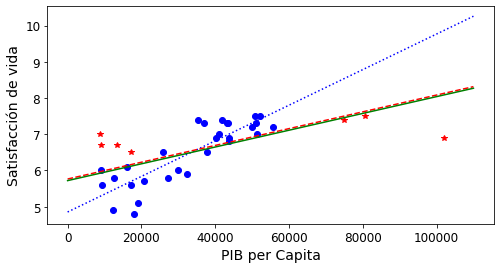

In [38]:
plt.figure(figsize = (8,4))
plt.xlabel("PIB per Capita")
plt.ylabel("Satisfacción de vida")
plt.plot(list(sample_data['GDP per Capita']), list(sample_data['Life satisfaction']), 'bo')
plt.plot(list(missing_data['GDP per Capita']), list(missing_data['Life satisfaction']), 'r*')
x = np.linspace(0,110000,10)
plt.plot(x, t0+t1*x, 'b:',label = 'Modelo Lineal de Entrenamiento')
plt.plot(x, t0full+t1full*x, 'r--',label = 'Modelo Lineal de Esperado')
plt.plot(x, t0ridge + t1ridge*x, 'g', label = 'Modelo con Ridge')